In [7]:
import geopandas as gpd
import os

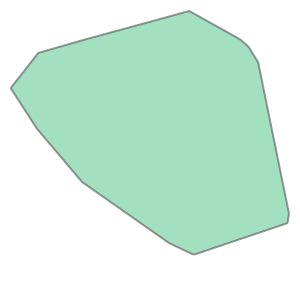

In [5]:
proj_crs = "EPSG:25832"

# read in latest folkersma data set
gdf = gpd.read_file(
    "../folkersma_digital/2023-08-01 Cycling network Denmark shapefiles/stretch.shp"
)

# convert to projected crs
gdf = gdf.to_crs(proj_crs)

# buffer and merge
polys = gdf.buffer(500).unary_union

# convex hull polygons for each region
polys = [p.convex_hull for p in polys.geoms]

# select polygon with Faxe kommune
i = 2
my_poly = polys[i]

my_poly

In [8]:
# make sure there's the user_input folder
os.makedirs("../user_input/", exist_ok=True)

# save as gpkg (to be used by 01_define_area)
gpd.GeoDataFrame(geometry=[my_poly], crs=gdf.crs).to_file(
    "../user_input/study_area.gpkg", index=False
)

print("Study area polygon saved")


Study area polygon saved
